In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import os 
import pandas as pd
from datetime import datetime
from signaltk import constants as cst

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["CMU Serif"]
})

DIR = os.path.join(os.path.dirname(os.getcwd()), "img")
DATA_DIR = os.path.join(os.path.dirname(os.getcwd()), "data")
DPI = 300

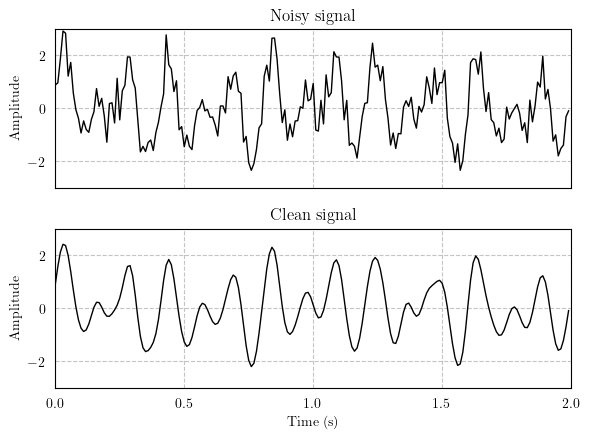

In [56]:
np.random.seed(0)  # For reproducibility

# --- Signal Parameters ---
frequency = 5  # Hz
amplitude = 1.0
sampling_rate = 100  # Samples per second
duration = 2  # Seconds

# --- Generate Time Vector ---
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# --- Generate Clean Sine Wave (sum of two frequencies for more complexity) ---
clean_signal = amplitude * np.sin(2 * np.pi * frequency * t) + amplitude * np.sin(2 * np.pi * frequency * 1.5 * t)

# --- Generate Noise ---
# Mean of the Gaussian noise (typically 0 for white noise)
noise_mean = 0
# Standard deviation of the Gaussian noise (controls noise intensity)
noise_std_dev = 0.5
noise = np.random.normal(noise_mean, noise_std_dev, len(t))

# --- Add Noise to Signal ---
noisy_signal = clean_signal + noise

# --- Butterworth Low-pass Filter Design ---
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.25 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# --- Filter Parameters ---
cutoff = 7  # Hz, just above the signal frequency
order = 4

# --- Apply Low-pass Filter to Noisy Signal ---
filtered_signal = butter_lowpass_filter(noisy_signal, cutoff, sampling_rate, order)


# --- Plotting to match the pasted image ---
fig, axs = plt.subplots(nrows=2, figsize=(6, 4.5), sharex=True, sharey=True)

axs[0].plot(t, noisy_signal, 'k', linewidth=1, zorder=25)
axs[0].set_title('Noisy signal')
axs[0].set_ylabel('Amplitude')

axs[1].plot(t, filtered_signal, 'k', linewidth=1, zorder=25)
axs[1].set_ylabel('Amplitude')
axs[1].set_xlabel('Time (s)')
axs[1].set_title('Clean signal')

for ax in axs:
    ax.set_xlim(0, duration)
    ax.set_ylim(-3, 3)
    ax.set_xticks(np.arange(0, duration + 0.5, 0.5))
    ax.grid(ls='--', alpha=0.75, zorder=-25)
    ax.tick_params(axis='both', which='major', left=False, bottom=False)

plt.tight_layout(h_pad=1.5)
plt.savefig(f"{DIR}/signal_illustration.pdf", dpi=DPI, transparent=True)
plt.show()

### Signals

In [57]:
from sklearn.preprocessing import RobustScaler

In [58]:
raw_signals = pd.read_pickle(f"{DATA_DIR}/raw_signals.pkl")
crsp = pd.read_pickle(f"{DATA_DIR}/crsp.pkl")

In [59]:
subset = [
    "UNITED AIR LINES INC",
    "APPLE COMPUTER INC",
    "APPLE INC",
    "FORD MOTOR CO",
    "FORD MOTOR CO DEL",
    "WALMART INC",
    "AMERICAN TELEPHONE & TELEG CO",
]

In [60]:
crsp[crsp["comnam"].isin(subset)].xs("2024-12-31")

,comnam,ret,shrout,vol,prc,altprc,exchcd,siccd,ticker,cusip,exchange,industry,ret_adj,excess_ret,dollar_vol,mktcap
permno,,,,,,,,,,,,,,,,
14593,APPLE INC,0.055155,15115823.0,9710426.0,250.42,250.42,3,3571,AAPL,03783310,NASDAQ,Manufacturing,0.055155,0.051455,2431684878.92,3785304395.66
25785,FORD MOTOR CO DEL,-0.110512,3903437.0,12187469.0,9.9,9.9,1,3711,F,34537086,NYSE,Manufacturing,-0.110512,-0.114212,120655943.1,38644026.3
55976,WALMART INC,-0.021,8033386.0,3821318.0,90.35,90.35,1,5311,WMT,93114210,NYSE,Retail,-0.021000,-0.0247,345256081.3,725816425.1


In [61]:
id_mapping = {
    "Apple Inc.": 14593,
    "Walmart Inc": 55976,
}

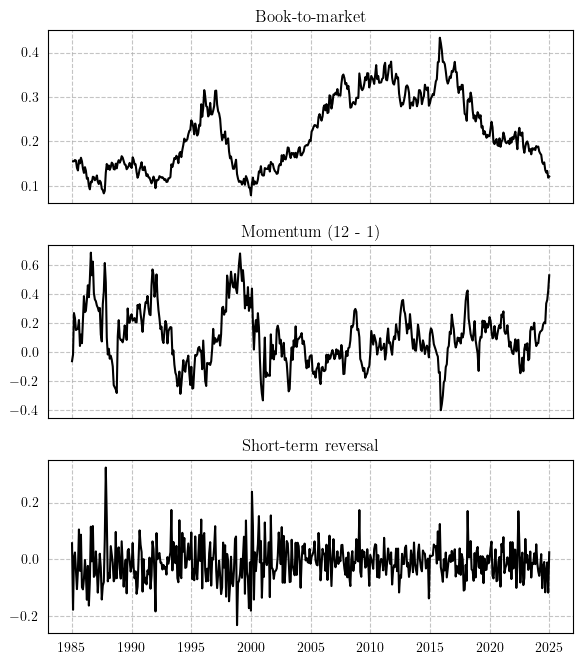

In [70]:
sig = {"b2m": "Book-to-market", "mom_12_1": "Momentum (12 - 1)", "strev": "Short-term reversal"}
_id = 55976  # Walmart Inc.
start_dt = datetime(1984, 12, 31)
fig, axs = plt.subplots(nrows=len(sig), figsize=(6, 2.25 * len(sig)), sharex=True, sharey=False)

for ax, s in zip(axs, sig):
    s_vals = raw_signals.loc[start_dt:].xs(_id, level=1)[s].dropna()
    ax.plot(s_vals, c="black")
    # ax.set_xlim(0, duration)
    # ax.set_ylim(-3, 3)
    ax.grid(ls='--', alpha=0.75, zorder=-25)
    ax.set_title(sig[s])
    ax.tick_params(axis='both', which='major', left=False, bottom=False)

plt.tight_layout(h_pad=1.5)
plt.savefig(f"{DIR}/inv_signal_example.pdf", dpi=DPI, transparent=True)
plt.show()

In [ ]:
transformer = RobustScaler().fit(s_i.to_frame().dropna())

In [ ]:
pd.Series(transformer.transform(s_i.to_frame().dropna()).flatten()).plot()

In [ ]:
s_i.plot()